# Exploratory data analysis (EDA)
Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### Importing scripts folder


In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

### Loading Libraries we will use in the project 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()

### Importing scripts & modules 

In [3]:
from helper import MyHelper
import utility
import plots

### Loading the data

In [4]:
CSV_PATH = "../data/AdSmartABdata.csv"

In [5]:
# the class has utility function we are going to use
Helper = MyHelper()

In [6]:
# we use our helper function to read csv data
# we treate values like 'n/a', 'na', 'undefined' as missing values

df = Helper.read_csv(CSV_PATH)

>> file read as csv


In [7]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Exploring the data

### Getting the basic info about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### Getting the basic description of the dataset

In [9]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [10]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


### Checking for duplicates

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8072    False
8073    False
8074    False
8075    False
8076    False
Length: 8077, dtype: bool

In [12]:
#Droping if there is any duplicates in the dataset
df.drop_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


### Checking the null counts

In [13]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Checking for missing values

In [14]:
#The percent_missing function checkes any missing values and convert it into percentage 

utility.percent_missing(df)

The dataset contains 0.0 % missing values.


### Counting the 'yes' and 'no' s in both groups

In [15]:
experiment_metrics = df.groupby('experiment').agg({'yes': 'sum','no': 'sum'})
experiment_metrics.sort_values(by=['yes','no'], ascending=False)

,yes,no
experiment,,
exposed,308,349
control,264,322


<AxesSubplot:xlabel='experiment'>

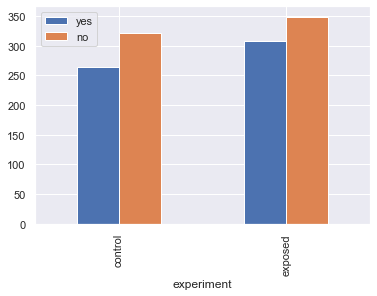

In [16]:
experiment_metrics.plot.bar()

In [17]:
experiment_metrics.describe()

,yes,no
count,2.000000,2.000000
mean,286.000000,335.500000
std,31.112698,19.091883
min,264.000000,322.000000
25%,275.000000,328.750000
50%,286.000000,335.500000
75%,297.000000,342.250000
max,308.000000,349.000000


### Checking Browser 

In [18]:

browser_metrics = df.groupby('browser').agg({'yes': 'sum','no': 'sum'})
browser_metrics.sort_values(by=['yes','no'], ascending=False)


,yes,no
browser,,
Chrome Mobile,314,381
Chrome Mobile WebView,116,111
Facebook,69,87
Samsung Internet,67,78
Mobile Safari,4,10
Chrome,1,1
Chrome Mobile iOS,1,0
Mobile Safari UI/WKWebView,0,3
Android,0,0


### Checking Device Make 

In [19]:

device_metrics = df.groupby('device_make').agg({'yes': 'sum','no': 'sum'})
device_metrics.sort_values(by=['yes','no'], ascending=False)


,yes,no
device_make,,
Generic Smartphone,321,398
Samsung SM-G960F,21,24
Samsung SM-G950F,16,19
Samsung SM-G930F,11,5
Samsung SM-G973F,10,12
...,...,...
XiaoMi Redmi Note 8,0,0
XiaoMi Redmi Note 8 Pro,0,0
XiaoMi Redmi Note 8T,0,0


In [20]:
device_metrics.describe()

,yes,no
count,270.000000,270.000000
mean,2.118519,2.485185
std,19.627404,24.296759
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,321.000000,398.000000


### Checking Platform OS 

In [21]:
platform_os_metrics = df.groupby('platform_os').agg({'yes': 'sum','no': 'sum'})
platform_os_metrics.sort_values(by=['yes','no'], ascending=False)


,yes,no
platform_os,,
6,567,659
5,5,12
7,0,0


In [22]:
platform_os_metrics.describe()

,yes,no
count,3.000000,3.000000
mean,190.666667,223.666667
std,325.923815,377.057467
min,0.000000,0.000000
25%,2.500000,6.000000
50%,5.000000,12.000000
75%,286.000000,335.500000
max,567.000000,659.000000


### Checking Outlier Detection 

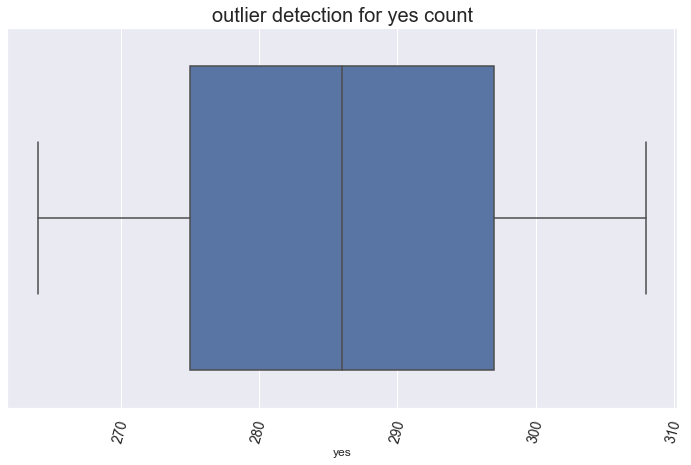

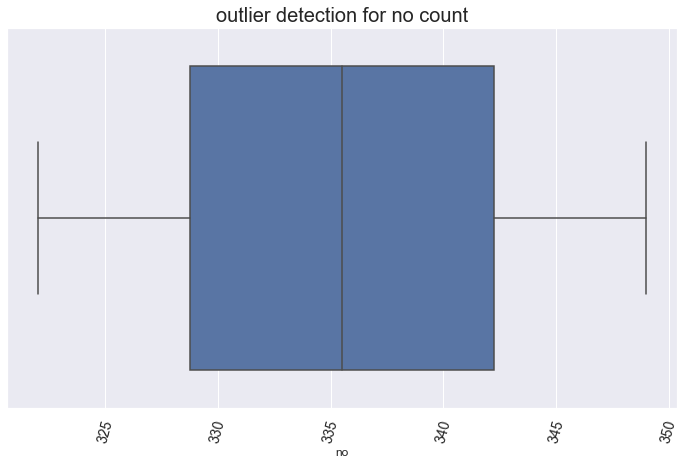

In [23]:
plots.plot_box(experiment_metrics, 'yes', 'outlier detection for yes count')
plots.plot_box(experiment_metrics, 'no', 'outlier detection for no count')

### Checking Distribution of Yes and No

<Figure size 648x504 with 0 Axes>

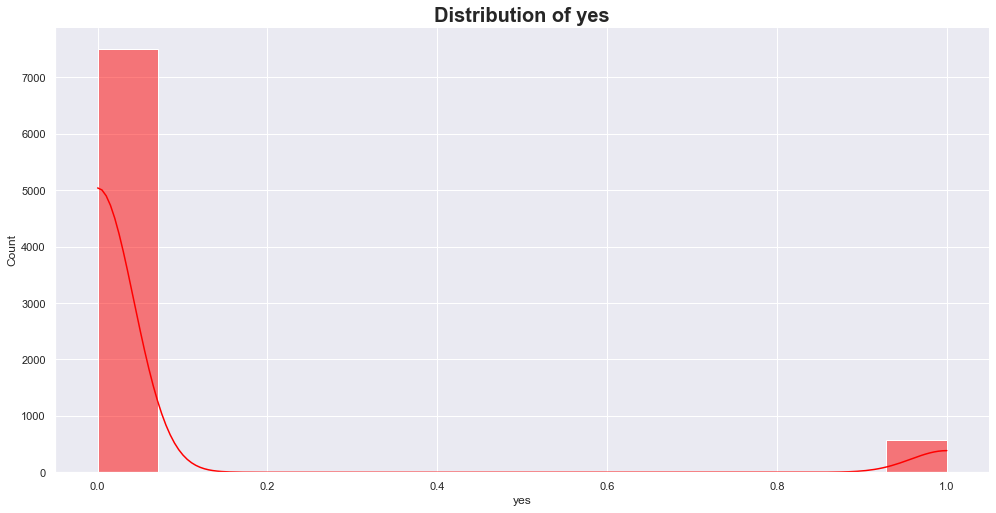

<Figure size 648x504 with 0 Axes>

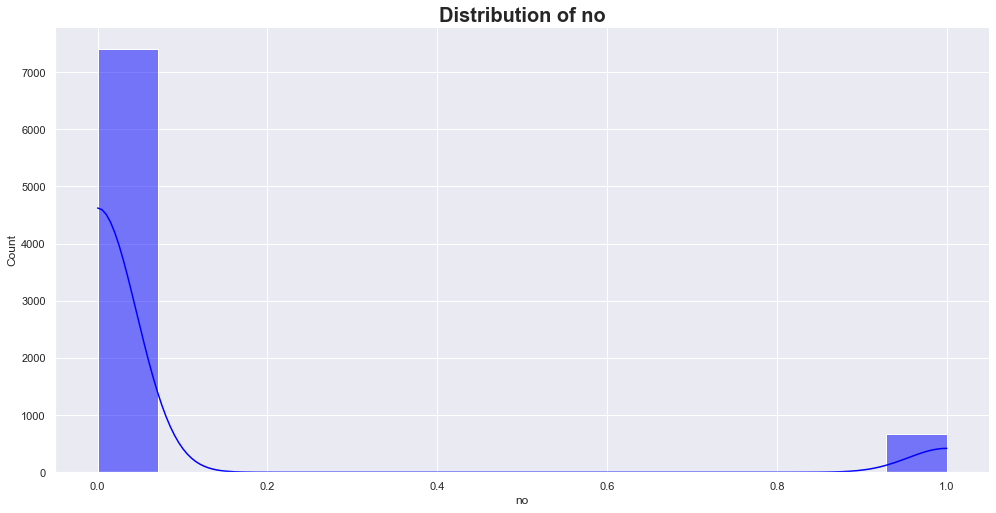

In [24]:
plots.plot_hist(df,'yes','red')
plots.plot_hist(df,'no','blue')


### Ploting Distrbution of Hour  

<Figure size 648x504 with 0 Axes>

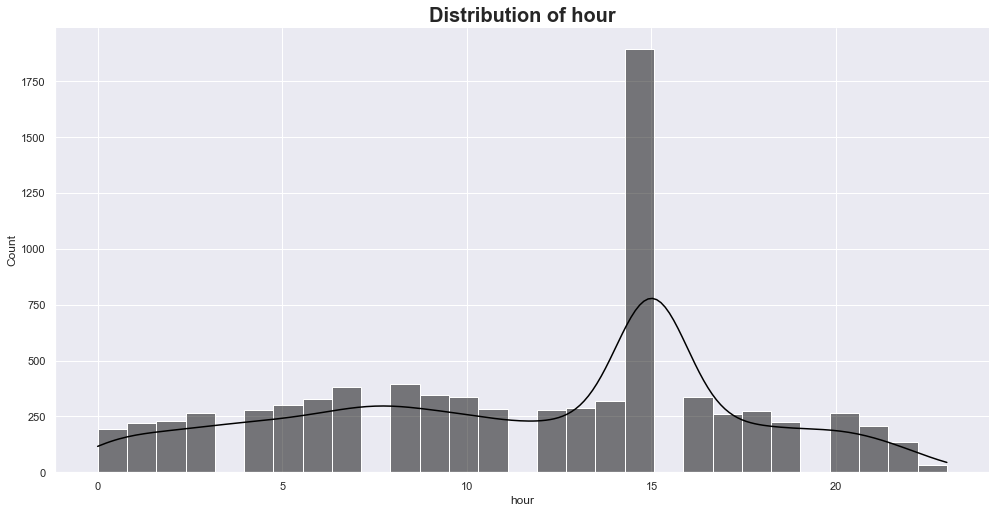

In [25]:
plots.plot_hist(df,'hour','black')

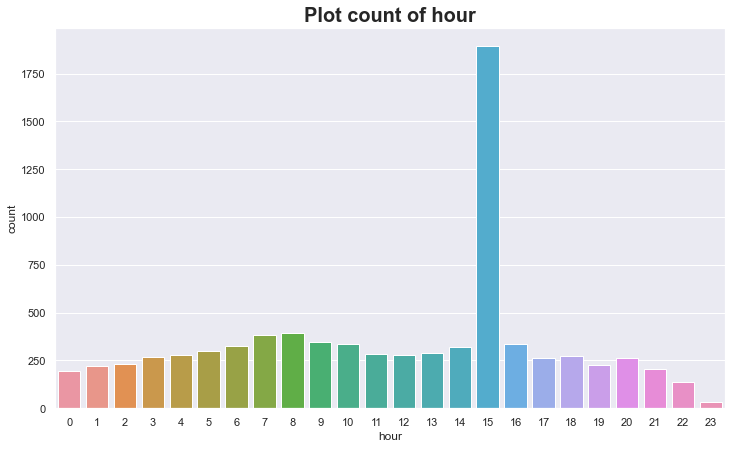

In [26]:
plots.plot_count(df,'hour')

In [27]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### Ploting Distrbution of Date  

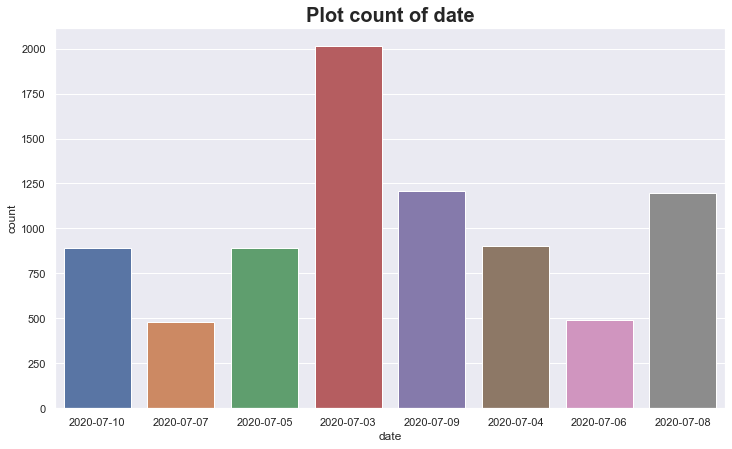

In [28]:
plots.plot_count(df,'date')

### Ploting Top 10 Browser  

In [29]:
df_browser = df[['browser']].head(10)

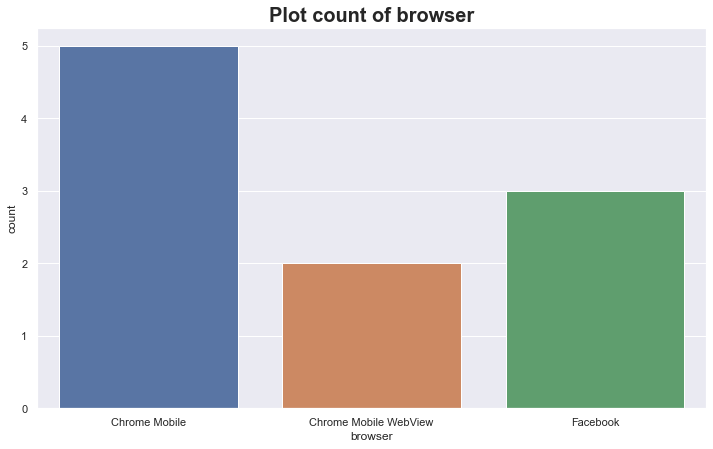

In [30]:

plots.plot_count(df_browser,'browser')


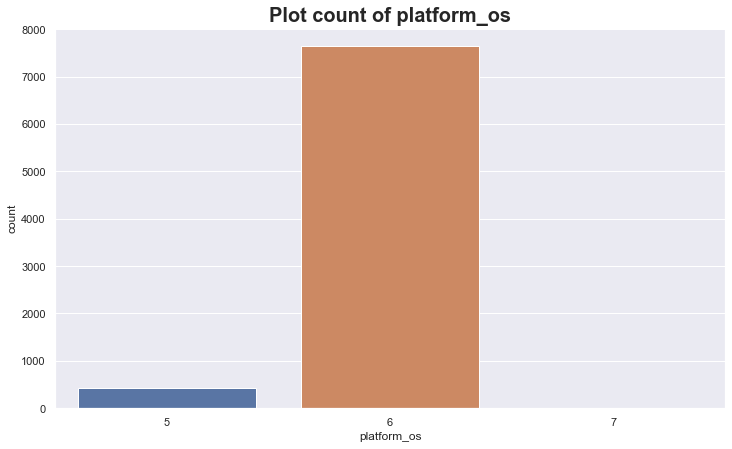

In [31]:
plots.plot_count(df,'platform_os')


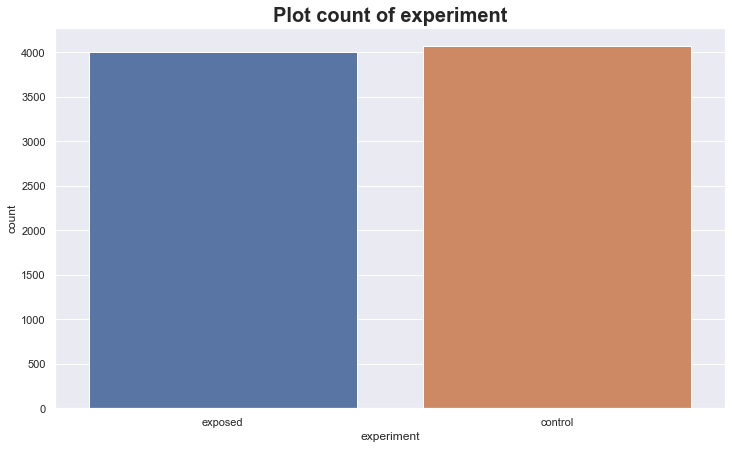

In [32]:
plots.plot_count(df,'experiment')

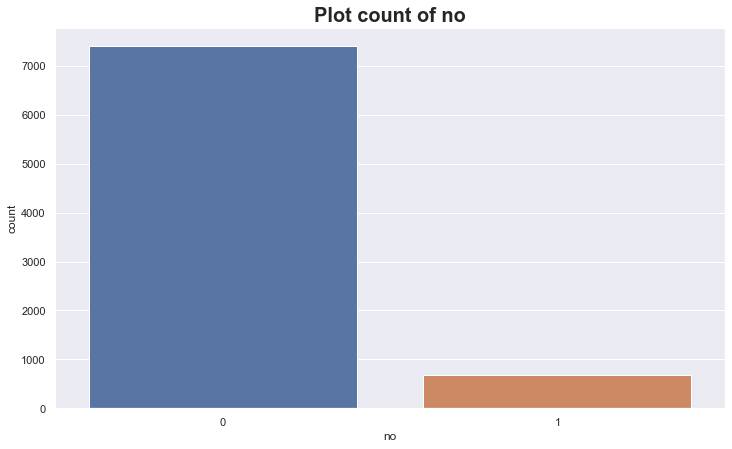

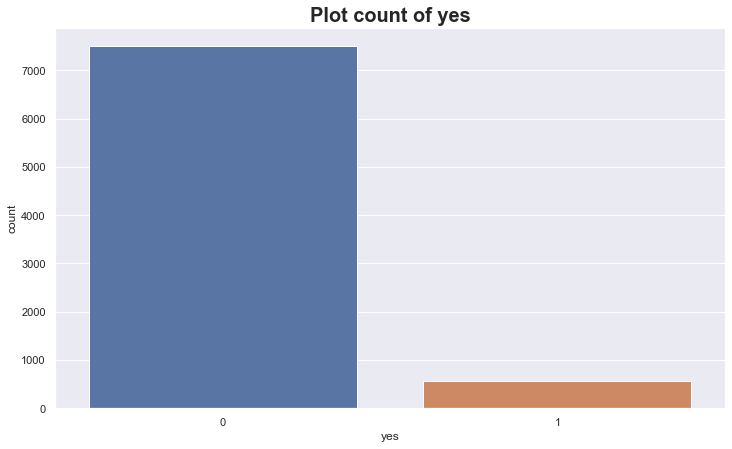

In [33]:
plots.plot_count(df,'no')
plots.plot_count(df,'yes')

<Figure size 648x504 with 0 Axes>

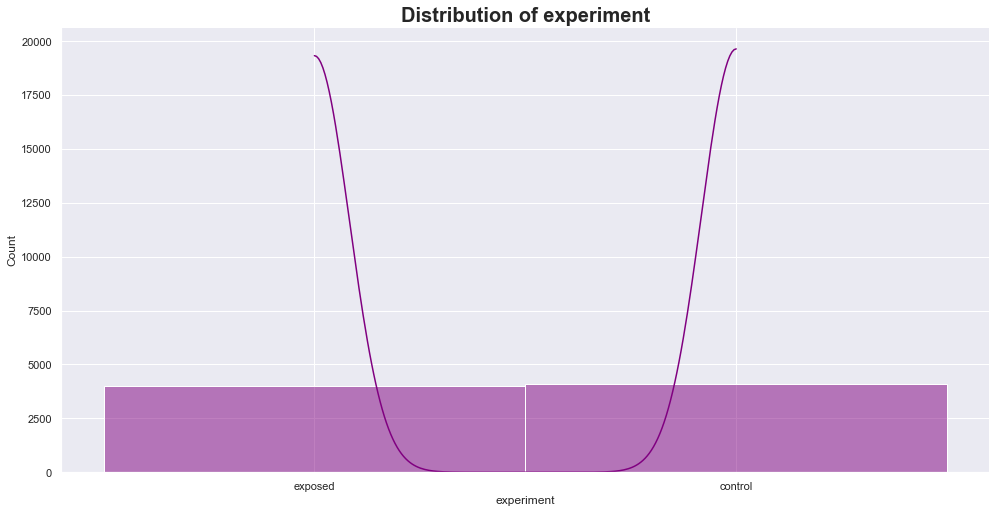

In [34]:
plots.plot_hist(df,'experiment','purple')



## The data is cleaned data.

### From the EDA I realised that the hour is where I am interseted to see the effect